In [40]:
import pandas as pd
energy = pd.read_csv("/Users/williamkapner/Documents/GSB_544/Project/EnergyData.csv", encoding='utf-16', delimiter= '\t')
revenue = pd.read_csv("/Users/williamkapner/Documents/GSB_544/Project/RevenueData.csv", encoding='utf-16', delimiter= '\t')
commute = pd.read_csv("/Users/williamkapner/Documents/GSB_544/Project/CommuteData.csv", encoding='utf-16', delimiter= '\t')
commute.head()



FileNotFoundError: [Errno 2] No such file or directory: '/Users/williamkapner/Documents/GSB_544/Project/EnergyData.csv'

In [ ]:
revenue.head()

,State,Government,Mode,Type,Year,Amount (thousands)
0,United States,Local,Total,Expenditure,2021,2219366293
1,United States,Local,Total,Revenue,2021,2395164866
2,United States,Local,Total,Expenditure,2020,2146665654
3,United States,Local,Total,Revenue,2020,2153395786
4,United States,Local,Total,Expenditure,2019,2071700319


In [ ]:
energy.rename(columns={'Year of Year': 'Year'}, inplace=True)
energy_consump = energy[energy['Measure']== "Energy consumption (trillion Btu)"]
energy_consump = energy_consump[energy_consump['State']!="United States"]
energy_consump = energy_consump[energy_consump['Sector']=="Transportation"]
energy_consump = energy_consump[energy_consump['Year']== 2010]
energy_consump


,State,Measure,Sector,Year,Pivot Field Values
298,Alabama,Energy consumption (trillion Btu),Transportation,2010,478.219
526,Alaska,Energy consumption (trillion Btu),Transportation,2010,193.249
754,Arizona,Energy consumption (trillion Btu),Transportation,2010,516.379
982,Arkansas,Energy consumption (trillion Btu),Transportation,2010,290.132
1210,California,Energy consumption (trillion Btu),Transportation,2010,2934.194
1438,Colorado,Energy consumption (trillion Btu),Transportation,2010,421.171
1666,Connecticut,Energy consumption (trillion Btu),Transportation,2010,239.166
1894,Delaware,Energy consumption (trillion Btu),Transportation,2010,80.359
2122,District of Columbia,Energy consumption (trillion Btu),Transportation,2010,19.202
2350,Florida,Energy consumption (trillion Btu),Transportation,2010,1555.772


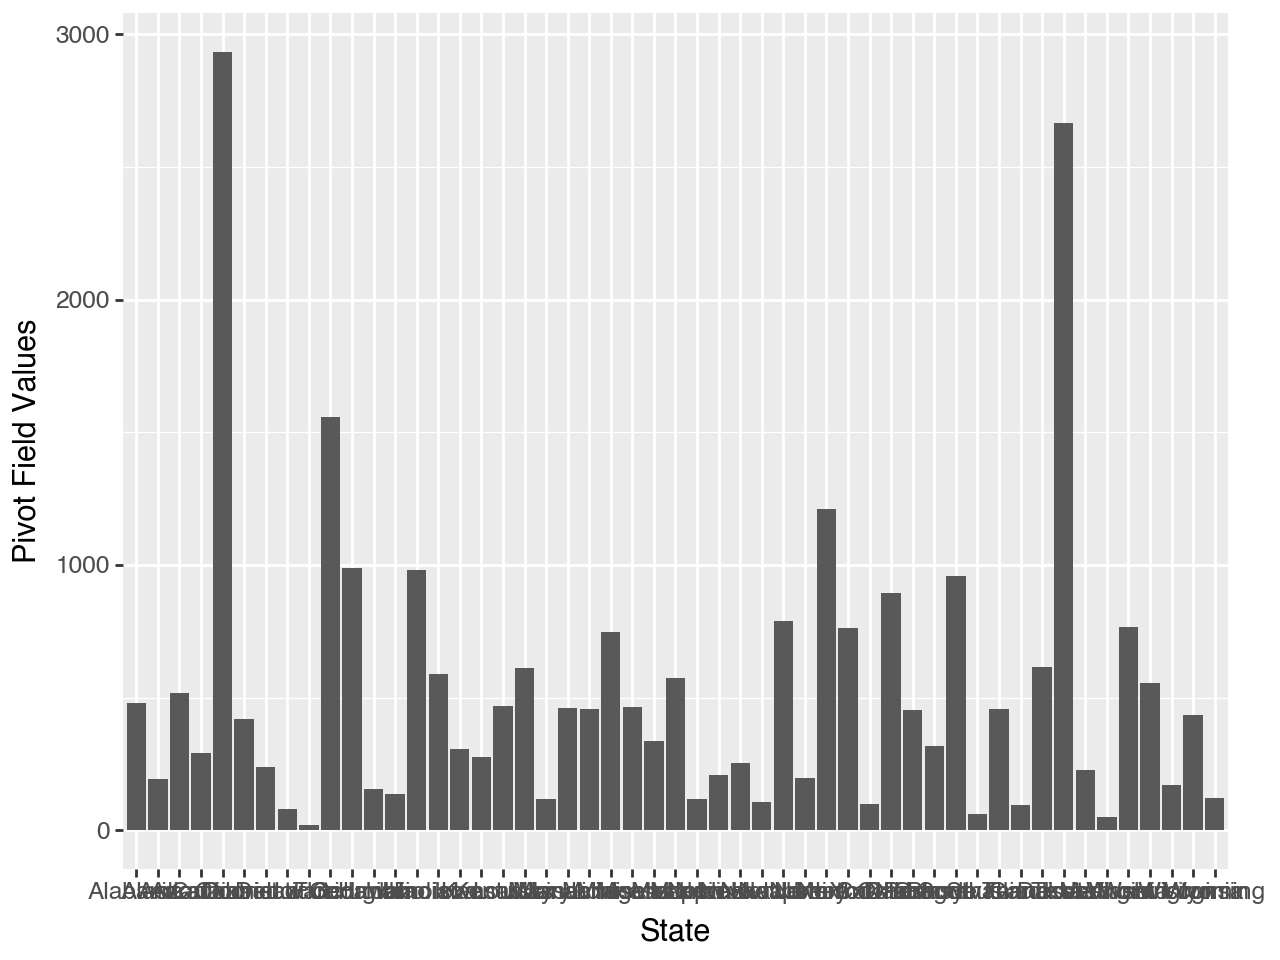

In [ ]:
import plotnine as pt
(pt.ggplot(energy_consump,pt.aes(x='State',y='Pivot Field Values'))
 +pt.geom_col(stat= 'identity'))

Hello Owen, are you here?


### Webscraping Population Data

In [ ]:
import requests
import pandas as pd
response = requests.get("https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population")
response

from bs4 import BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

len(soup.find_all("table"))

len(soup.find_all("table",
                  attrs={
                      "class": "wikitable",
                      "style": "text-align:right"}
                  ))

table = soup.find_all("table",
                  attrs={
                      "class": "wikitable",
                      "style": "text-align:right"}
                  )[0]

city = []
state = []
population = []
landarea = []
for faculty in table.find_all('tr')[2:]:
    city.append(faculty.find_all("td")[0].get_text(strip = True))
    state.append(faculty.find_all("td")[1].get_text(strip = True))
    population.append(faculty.find_all("td")[2].get_text(strip = True))
    landarea.append(faculty.find_all("td")[5].get_text(strip = True))



newstructure = pd.DataFrame({'State': city,
    'Population 2023': state,
    'Population 2020': population})
newstructure

,State,Population 2023,Population 2020
0,California,"38,965,193","39,538,223"
1,Texas,"30,503,301","29,145,505"
2,Florida,"22,610,726","21,538,187"
3,New York,"19,571,216","20,201,249"
4,Pennsylvania,"12,961,683","13,002,700"
5,Illinois,"12,549,689","12,812,508"
6,Ohio,"11,785,935","11,799,448"
7,Georgia,"11,029,227","10,711,908"
8,North Carolina,"10,835,491","10,439,388"
9,Michigan,"10,037,261","10,077,331"


In [ ]:
census2020 = pd.read_excel("/Users/williamkapner/Documents/GSB_544/GSB544Project/NST-EST2023-POP.xlsx",skiprows=3)
census2020 = census2020.rename(columns={
    'Unnamed: 0': 'State',
    'Unnamed: 1': 'Base Population',
    2020: 'POPESTIMATE2020',
    2021: 'POPESTIMATE2021',
    2022: 'POPESTIMATE2022',
    2023: 'POPESTIMATE2023',
})

census2020['State'] = census2020['State'].str.lstrip('.')
census2020[0:55]
#census2020[["2020"]]

,State,Base Population,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023
0,United States,331464948.0,331526933.0,332048977.0,333271411.0,334914895.0
1,Northeast,57614141.0,57430477.0,57243423.0,57026847.0,56983517.0
2,Midwest,68987296.0,68969794.0,68850246.0,68783028.0,68909283.0
3,South,126268529.0,126465281.0,127353282.0,128702030.0,130125290.0
4,West,78594982.0,78661381.0,78602026.0,78759506.0,78896805.0
5,Alabama,5024294.0,5031864.0,5050380.0,5073903.0,5108468.0
6,Alaska,733374.0,732964.0,734923.0,733276.0,733406.0
7,Arizona,7157902.0,7186683.0,7272487.0,7365684.0,7431344.0
8,Arkansas,3011490.0,3014348.0,3028443.0,3046404.0,3067732.0
9,California,39538212.0,39503200.0,39145060.0,39040616.0,38965193.0


In [ ]:
census2010 = pd.read_csv("/Users/williamkapner/Documents/GSB_544/GSB544Project/nst-est2019-popchg2010_2019.csv")


,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,...,NRANK_PPCHG2010,NRANK_PPCHG2011,NRANK_PPCHG2012,NRANK_PPCHG2013,NRANK_PPCHG2014,NRANK_PPCHG2015,NRANK_PPCHG2016,NRANK_PPCHG2017,NRANK_PPCHG2018,NRANK_PPCHG2019
0,10,0,0,0,United States,308758105,309321666,311556874,313830990,315993715,...,X,X,X,X,X,X,X,X,X,X
1,20,1,0,0,Northeast Region,55318443,55380134,55604223,55775216,55901806,...,3,3,3,4,4,4,4,4,4,4
2,20,2,0,0,Midwest Region,66929725,66974416,67157800,67336743,67560379,...,4,4,4,3,3,3,3,3,3,3
3,20,3,0,0,South Region,114563030,114866680,116006522,117241208,118364400,...,1,1,1,1,1,1,1,1,1,1
4,20,4,0,0,West Region,71946907,72100436,72788329,73477823,74167130,...,2,2,2,2,2,2,2,2,2,2
5,40,3,6,1,Alabama,4780125,4785437,4799069,4815588,4830081,...,37,38,34,33,35,36,34,33,28,26
6,40,4,9,2,Alaska,710249,713910,722128,730443,737068,...,2,7,11,18,48,37,22,48,50,50
7,40,4,8,4,Arizona,6392288,6407172,6472643,6554978,6632764,...,17,10,8,7,7,9,7,6,4,3
8,40,3,7,5,Arkansas,2916031,2921964,2940667,2952164,2959400,...,22,28,31,38,31,30,26,24,27,27
9,40,4,9,6,California,37254519,37319502,37638369,37948800,38260787,...,27,18,20,21,16,17,20,22,29,36


In [42]:
merged_census = pd.merge(census2010,census2020,left_on = "NAME" , right_on= "State",how = 'inner')
merged_census.head()
merged_census[['NAME', 'POPESTIMATE2010','POPESTIMATE2011','POPESTIMATE2012','POPESTIMATE2013','POPESTIMATE2014','POPESTIMATE2015','POPESTIMATE2016','POPESTIMATE2017','POPESTIMATE2018','POPESTIMATE2019','POPESTIMATE2020','POPESTIMATE2021','POPESTIMATE2022','POPESTIMATE2023']]


,NAME,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023
0,United States,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523,331526933.0,332048977.0,333271411.0,334914895.0
1,Alabama,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185,5031864.0,5050380.0,5073903.0,5108468.0
2,Alaska,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545,732964.0,734923.0,733276.0,733406.0
3,Arizona,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717,7186683.0,7272487.0,7365684.0,7431344.0
4,Arkansas,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804,3014348.0,3028443.0,3046404.0,3067732.0
5,California,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223,39503200.0,39145060.0,39040616.0,38965193.0
6,Colorado,5047349,5121108,5192647,5269035,5350101,5450623,5539215,5611885,5691287,5758736,5785219.0,5811596.0,5841039.0,5877610.0
7,Connecticut,3579114,3588283,3594547,3594841,3594524,3587122,3578141,3573297,3571520,3565287,3577586.0,3603691.0,3608706.0,3617176.0
8,Delaware,899593,907381,915179,923576,932487,941252,948921,956823,965479,973764,991862.0,1004881.0,1019459.0,1031890.0
9,District of Columbia,605226,619800,634924,650581,662328,675400,685815,694906,701547,705749,670839.0,669037.0,670949.0,678972.0


In [ ]:
#2020-2023 Census Data
census2020 = pd.read_excel("/Users/williamkapner/Documents/GSB_544/GSB544Project/NST-EST2023-POP.xlsx",skiprows=3)
census2020 = census2020.rename(columns={
    'Unnamed: 0': 'State',
    'Unnamed: 1': 'Base Population',
    2020: 'POPESTIMATE2020',
    2021: 'POPESTIMATE2021',
    2022: 'POPESTIMATE2022',
    2023: 'POPESTIMATE2023',
})

census2020['State'] = census2020['State'].str.lstrip('.')

#Census Data 2010-2020
census2010 = pd.read_csv("/Users/williamkapner/Documents/GSB_544/GSB544Project/nst-est2019-popchg2010_2019.csv")


#Merging the Datasets
merged_census = pd.merge(census2010,census2020,left_on = "NAME" , right_on= "State",how = 'inner')
merged_census.head()
final_population = merged_census[['NAME', 'POPESTIMATE2010','POPESTIMATE2011','POPESTIMATE2012','POPESTIMATE2013','POPESTIMATE2014','POPESTIMATE2015','POPESTIMATE2016','POPESTIMATE2017','POPESTIMATE2018','POPESTIMATE2019','POPESTIMATE2020','POPESTIMATE2021','POPESTIMATE2022','POPESTIMATE2023']]


,NAME,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023
0,United States,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523,331526933.0,332048977.0,333271411.0,334914895.0
1,Alabama,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185,5031864.0,5050380.0,5073903.0,5108468.0
2,Alaska,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545,732964.0,734923.0,733276.0,733406.0
3,Arizona,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717,7186683.0,7272487.0,7365684.0,7431344.0
4,Arkansas,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804,3014348.0,3028443.0,3046404.0,3067732.0
5,California,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223,39503200.0,39145060.0,39040616.0,38965193.0
6,Colorado,5047349,5121108,5192647,5269035,5350101,5450623,5539215,5611885,5691287,5758736,5785219.0,5811596.0,5841039.0,5877610.0
7,Connecticut,3579114,3588283,3594547,3594841,3594524,3587122,3578141,3573297,3571520,3565287,3577586.0,3603691.0,3608706.0,3617176.0
8,Delaware,899593,907381,915179,923576,932487,941252,948921,956823,965479,973764,991862.0,1004881.0,1019459.0,1031890.0
9,District of Columbia,605226,619800,634924,650581,662328,675400,685815,694906,701547,705749,670839.0,669037.0,670949.0,678972.0
